In [1]:
from ZIFA import ZIFA, block_ZIFA
import numpy as np
import random
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import scanpy.api as sc

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
input_file = '../simulated/hgmm100/6_groups/hgmm100_sim_loc1_zheng17.h5'

In [3]:
h5f = h5py.File(input_file,'r')

In [4]:
h5f = h5py.File(input_file, 'r')
matrix = h5f['matrix'][:]
barcodes = h5f['cell_attrs']['cell_names'].value
cell_groups = h5f['cell_attrs']['cell_groups'].value
h5f.close()
matrix = np.log1p(matrix)

In [8]:
matrix = np.log1p(matrix)

In [10]:
Y = matrix
k = 2

In [10]:
model = FactorAnalysis(n_components=k)
factor_analysis_Zhat = model.fit_transform(Y)

In [11]:
pca = PCA(n_components=2)
pca_Zhat = pca.fit_transform(Y)

In [15]:
tsne_Zhat = TSNE(init='pca', n_components=2).fit_transform(Y)

In [31]:
tsne_Zhat.shape

(2495, 2)

In [12]:
Zhat, params = block_ZIFA.fitModel(Y, k, p0_thresh=0.9, n_blocks=8)

Filtering out all genes which are zero in more than 90.0% of samples. To change this, change p0_thresh.
Running block zero-inflated factor analysis with N = 56, D = 414, K = 2, n_blocks = 8
Block sizes [51, 51, 51, 51, 51, 51, 51, 57]


/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/ZIFA/block_ZIFA.py:220: RuntimeWarning: invalid value encountered in sqrt
  sigmas = np.atleast_2d(np.sqrt(sigmas / N)).transpose()
/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Error: algorithm failed to converge. Usual solutions to this problem: filtering out genes which are zero more than 80 - 90% of the time, or using standard ZIFA. Automatically retrying ZIFA when filtering out genes.
Previously, maximum fraction of zeros for a gene was 0.893; now lowering that to 0.848 and rerunning ZIFA
After filtering out genes with too many zeros, 56 samples and 284 genes
Running block zero-inflated factor analysis with N = 56, D = 284, K = 2, n_blocks = 8
Block sizes [35, 35, 35, 35, 35, 35, 35, 39]
Param change below threshold 1.000e-02 after 8 iterations


In [13]:
Zhat

array([[-0.7808453 ,  0.46521994],
       [-0.11814511, -1.59099773],
       [ 0.0129621 , -1.39131363],
       [-0.87923857,  0.15420564],
       [ 1.08934032,  0.41768495],
       [ 0.22228412, -1.40369834],
       [ 0.61060437,  0.19889447],
       [-0.89612214,  0.36987069],
       [-0.8684291 ,  0.45198939],
       [ 1.12716118,  0.64220014],
       [ 0.54086523,  0.26065161],
       [ 1.46952734,  0.4436846 ],
       [ 0.52312174, -0.18419921],
       [ 0.31332203, -2.53552212],
       [ 0.38692062, -1.65761407],
       [ 1.39872366,  0.49526605],
       [ 1.14244611,  0.39672816],
       [ 0.18074065,  0.30750773],
       [ 0.59818352,  0.21227669],
       [-1.04557337,  0.34383886],
       [ 0.30285383, -1.77820096],
       [ 0.65879986,  0.38842059],
       [ 0.26485878, -1.45981484],
       [ 3.84940595,  2.45023064],
       [ 0.65835474,  0.46266117],
       [ 1.34152379,  0.37140902],
       [ 0.16611083, -1.3434004 ],
       [-0.86215889,  0.39297017],
       [ 0.5423659 ,

In [ ]:
normalized_mutual_info_score(cell_groups, cr)

In [18]:
cluster_ids

[1, 2, 3]

In [17]:
ids

[3,
 2,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 3,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 1,


In [12]:
colors = ['red', 'blue', 'green']
cluster_ids = sorted(list(set(ids)))

1
2
3


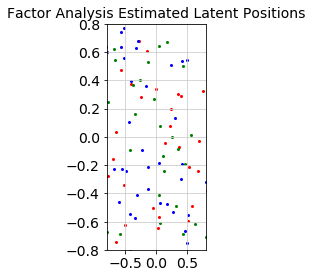

In [13]:
plt.subplot(133)
for id in cluster_ids:
    print(id)
    plt.scatter(pca_Zhat[[i==id for i in ids],0], pca_Zhat[[i==id for i in ids],1], color = colors[id - 1], s = 4)
    plt.xlim([-0.8, 0.8])
    plt.ylim([-0.8, 0.8])
    plt.title('Factor Analysis Estimated Latent Positions')

plt.show()


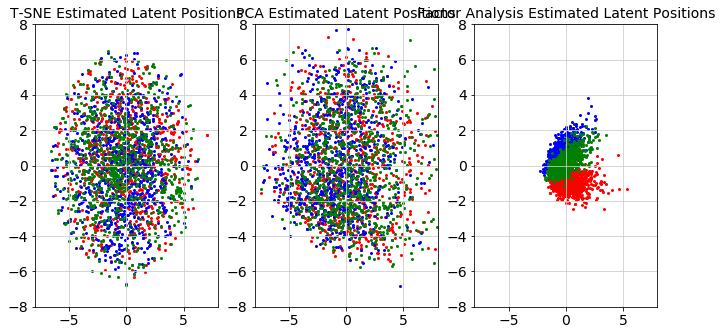

In [16]:
plt.figure(figsize=[15, 5])

plt.subplot(141)
for id in cluster_ids:
    plt.scatter(tsne_Zhat[[i==id for i in ids],0], tsne_Zhat[[i==id for i in ids],1], color = colors[id - 1], s = 4)
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.title('T-SNE Estimated Latent Positions')
    # title(titles[method])

plt.subplot(142)
for id in cluster_ids:
    plt.scatter(pca_Zhat[[i==id for i in ids],0], pca_Zhat[[i==id for i in ids],1], color = colors[id - 1], s = 4)
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.title('PCA Estimated Latent Positions')
    # title(titles[method])

plt.subplot(143)
for id in cluster_ids:
    plt.scatter(factor_analysis_Zhat[[i==id for i in ids],0], factor_analysis_Zhat[[i==id for i in ids],1], color = colors[id - 1], s = 4)
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.title('Factor Analysis Estimated Latent Positions')
'''
plt.subplot(144)
for id in cluster_ids:
    plt.scatter(Zhat[[i==id for i in ids],0], Zhat[[i==id for i in ids],1], color = colors[id - 1], s = 4)
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.title('Factor Analysis Estimated Latent Positions')
'''


plt.show()